# <div align="center">OLS</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import warnings

warnings.filterwarnings('ignore')
    
%matplotlib inline

## 1. 读取数据

贾俊平<<统计学(第六版)>线性回归章节例题数据

In [2]:
db = '/home/lidong/Datasets/'
bad_loans_df = pd.read_excel(os.path.join(db, "Statistics/bad-loans.xls"), usecols="B:F")
bad_loans_df[0:5]

,不良贷款 (亿元）,各项贷款余额 (亿元),本年累计应收贷款 (亿元),贷款项目个数 (个),本年固定资产投资额 (亿元)
0,0.9,67.3,6.8,5,51.9
1,1.1,111.3,19.8,16,90.9
2,4.8,173.0,7.7,17,73.7
3,3.2,80.8,7.2,10,14.5
4,7.8,199.7,16.5,19,63.2


In [3]:
# 不良贷款Y, 各项贷款余额X
ys_loans_bad = bad_loans_df.iloc[:, 0]
xs_loans_balance = bad_loans_df.iloc[:, 1]

## 2. 画出散点图

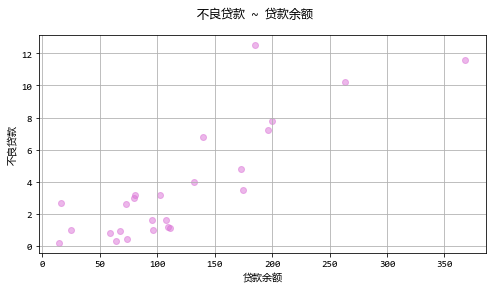

In [4]:
fig, ax = plt.subplots(figsize=(8,4))
fig.suptitle("不良贷款 ~ 贷款余额")
ax.set_xlabel("贷款余额")
ax.set_ylabel("不良贷款")
ax.grid(True)
ax.scatter(xs_loans_balance, ys_loans_bad, alpha=0.5, color='orchid')

# fig.tight_layout(pad=1)  # Adjust subplot parameters to give specified padding.

## 3. 回归分析 

Model: y ~ x + c

In [5]:
xs_loans_balance_with_intercept = sm.add_constant(xs_loans_balance)
xs_loans_balance_with_intercept[0:5]

,const,各项贷款余额 (亿元)
0,1.0,67.3
1,1.0,111.3
2,1.0,173.0
3,1.0,80.8
4,1.0,199.7


In [6]:
# 拟合
model_ols = sm.OLS(endog=ys_loans_bad, exog=xs_loans_balance_with_intercept)
fitted_ols = model_ols.fit()

# 预测
xs_pred = np.linspace(start=xs_loans_balance.min(), stop=xs_loans_balance.max(), num=60)
xs_pred_with_intercept = sm.add_constant(xs_pred)
ys_pred = fitted_ols.predict(exog=xs_pred_with_intercept)

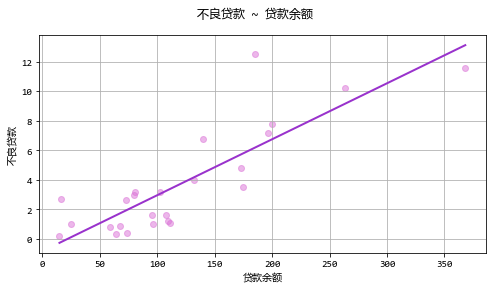

In [7]:
# 画出预测散点图
ax.plot(xs_pred, ys_pred, '-', color='darkorchid', linewidth=2)
fig

In [8]:
# 显示统计检验结果
# fitted_ols.summary2(float_format="%.4f")
fitted_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              不良贷款
(亿元）   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     56.75
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           1.18e-07
Time:                        22:20:03   Log-Likelihood:                -51.508
No. Observations:                  25   AIC:                             107.0
Df Residuals:                      23   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8295      0.723     -1.147      0.263      -2.325       0.666
各项贷款余额
(亿元)     0.0379      0.005      7.534      0.000       0.027       0.048
==============================================================================
Omnibus:                       14.277   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.611
Skew:                           1.382   Prob(JB):                     0.000672
Kurtosis:                       5.527   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--------------------

判定系数: $R^2 = \dfrac{SSR}{SST} = 0.712$, 拟合优度的度量, 在不良贷款的取值变动中有71.2%是由贷款余额所决定的.

多重判定系数(调整后): 解释变量变多, 势必导致误差SSE变小, 进而$R^2$变大(高估了), 修正$R_\alpha^2 = 1 - (1 - R^2)(\dfrac{n-1}{n - k - 1}) = 0.699$

$\beta_0 = -0.8295$, P-Value($\beta_0$) = 0.2631, 置信区间[-2.3252, 0.6662]

$\beta_1 = 0.0379$, P-Value($\beta_1$) = 0.0000, 置信区间[0.0275, 0.0483]

### 1. 线性关系的F检验

$H_0: \beta_1 = 0$

$F = \dfrac{SSR/1}{SSE/(n-2)} = \dfrac{MSR}{MSE} ~ F(1, n-2)$

查表$F_\alpha(1, 23) = 4.28 < F-statistic = 56.75$, Sig.F(P-Value) = 1.18e-07 < $\alpha = 0.05$, 决绝$H_0$


### 2. 回归系数的t检验

$H_0: \beta_1 = 0$

$t = 7.534 > t_0.025 = 2.0687$， P-Value = 0.000 < $\alpha$ = 0.05, 决绝$H_0$

**所有统计量检验都是在$H_0$成立的假设条件下, 计算概率的**

## 4. 区间估计

### 置信区间估计 (y平均值的置信区间估计)

$$
\hat{y_0} \pm t_{\alpha/2}s_e \sqrt{\dfrac{1}{n} + \dfrac{(x_0 - \bar{x})^2}{\sum_{i = 1}^{n}(x_i - \bar{x})^2}}
$$

There is a 95 percent probability that the true regression line for the population lies within the confidence interval for our estimate of the regression line calculated from the sample data. 

In [9]:
n = len(xs_loans_balance) # sample count
dof = n - fitted_ols.df_model - 1

y_hat = fitted_ols.predict(xs_loans_balance_with_intercept)
y_err = ys_loans_bad - y_hat
x_bar = xs_loans_balance.mean() # xs_loans_balance_with_intercept.T.iloc[1].mean() 
s_var = np.sum(np.power(y_err, 2))
s_err = np.sqrt(s_var/dof)

t_half_alpha = stats.t.ppf(1-0.025, df = dof)

# TODO: x_var = np.sum(np.power(xs_pred - x_bar, 2))
x_var = np.sum(np.power(xs_loans_balance - x_bar, 2))

# 计算每个x对应的y平均值的置信区间

dalta_conf = t_half_alpha * s_err * np.sqrt(1.0/n + np.power(xs_pred - x_bar, 2)/x_var)

lower_95_percent = ys_pred - dalta_conf 
upper_95_percent = ys_pred + dalta_conf

print(t_half_alpha, s_err, x_var)

2.0686576104190406 1.979947532717681 154933.5744


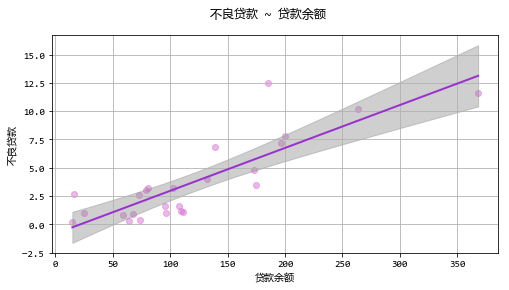

In [10]:
# plot
ax.fill_between(xs_pred, lower_95_percent, upper_95_percent, color='#888888', alpha=0.4)
fig

### 预测区间估计 (y个别值的预测区间估计)

statsmodels 提供了api直接计算出预测区间

$$
\hat{y_0} \pm t_{\alpha/2}s_e \sqrt{1 + \dfrac{1}{n} + \dfrac{(x_0 - \bar{x})^2}{\sum_{i = 1}^{n}(x_i - \bar{x})^2}}
$$

There is a 95 percent probability that the real value of y in the population for a given value of x lies within the prediction interval. 

预测区间{除了X的影响,还有随机因素}比置信区间{$E(Y) = E(\beta_0) + E(\beta_1X) + E(\epsilon)$, 其中$E(\epsilon)=0$} 要宽, 从公式看, 开根号下多了1.

In [11]:
# calculate standard deviation and confidence interval for prediction
# sdev, lower, upper = wls_prediction_std(fitted_ols, exog=xs_pred_with_intercept, alpha=0.05)
# ax.fill_between(xs_pred, lower, upper, color='#888888', alpha=0.1)
# fig

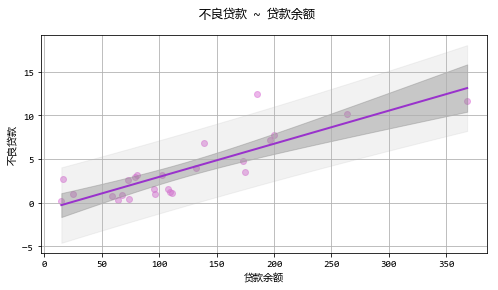

In [12]:
dalta_pred = t_half_alpha * s_err * np.sqrt(1 + 1.0/n + np.power(xs_pred - x_bar, 2)/x_var)

lower_95_percent = ys_pred - dalta_pred 
upper_95_percent = ys_pred + dalta_pred

ax.fill_between(xs_pred, lower_95_percent, upper_95_percent, color='#888888', alpha=0.1)
fig